In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [5]:
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

In [6]:
def sarsa():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(state, epsilon)
        total_reward = 0
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            total_reward += reward
            state = next_state
            action = next_action
            if done:
                rewards.append(total_reward)
                break
    return rewards

In [7]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [8]:
def q_learning():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            total_reward += reward
            state = next_state
            if done:
                rewards.append(total_reward)
                break
    return rewards


In [9]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [10]:
def expected_sarsa():
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = epsilon_greedy_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            expected_value = np.dot(Q[next_state, :], np.ones(env.action_space.n) * epsilon / env.action_space.n) + \
                             np.max(Q[next_state, :]) * (1 - epsilon)
            Q[state, action] += alpha * (reward + gamma * expected_value - Q[state, action])
            total_reward += reward
            state = next_state
            if done:
                rewards.append(total_reward)
                break
    return rewards

In [11]:
r_sarsa = sarsa()
r_qlearn = q_learning()
r_esarsa = expected_sarsa()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Text(0, 0.5, 'Rewards')

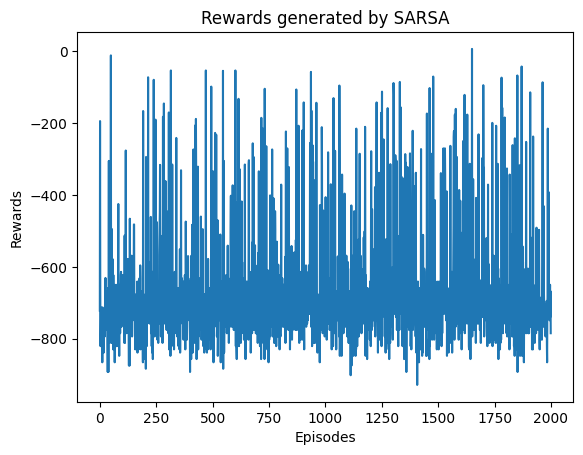

In [12]:
plt.plot(r_sarsa)
plt.title('Rewards generated by SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [13]:
np.mean(r_sarsa)

-670.932

Text(0, 0.5, 'Rewards')

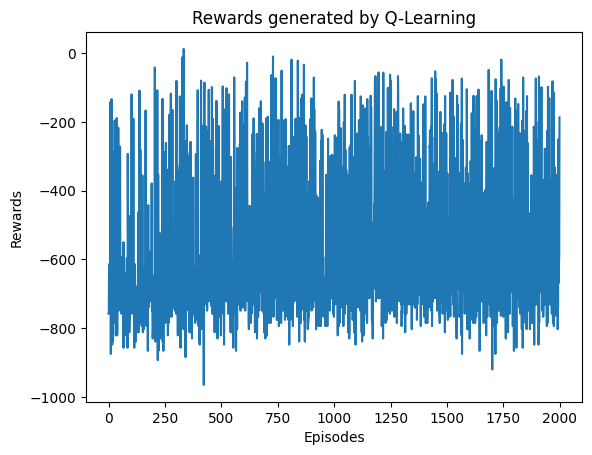

In [14]:
plt.plot(r_qlearn)
plt.title('Rewards generated by Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [15]:
np.mean(r_qlearn)

-566.9685

Text(0, 0.5, 'Rewards')

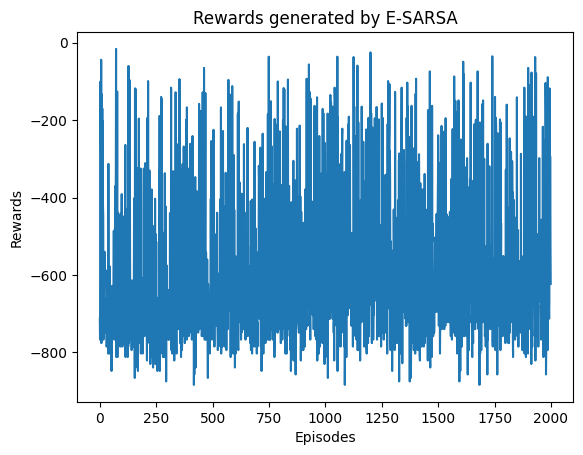

In [16]:
plt.plot(r_esarsa)
plt.title('Rewards generated by E-SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

In [17]:
np.mean(r_esarsa)

-598.617